# Ames House Sale Price Exploratory Analysis
Derek Long, 06/05/2021

## I. Get the data

The data used for this project is the Ames Housing dataset, collected by Dean De Cock, which contains data describing sales of individual residential properties in Ames, Iowa from 2006 to 2010 (http://jse.amstat.org/v19n3/decock.pdf). Furthermore, no authorisation is necessary to use the dataset - it has been shared to freely use, as stated by Dean (this means no access restrictions). A workspace has also been created to neatly organise the project into different repositories, such as one for data and another for documentation. 

In [2]:
config = {"data_repository": "https://www.kaggle.com/c/engsci-762-term1213/data",
         "instructions": "download data files - train.csv, test.csv, data_description.txt and sample_submission.csv"}
config

{'data_repository': 'https://www.kaggle.com/c/engsci-762-term1213/data',
 'instructions': 'download data files - train.csv, test.csv, data_description.txt and sample_submission.csv'}

Four different files have been provided (from Kaggle) to assist with the project in an easy-to-manipulate format - train.csv, test.csv, data_description.txt and sample_submission.csv. The total space of these four files is approximately 1MB. The dataset's 2930 observations have been separated into training and testing csv files, with the training file used to train the model and the testing file to test the model's performance (so there is no need to sample a test set). The txt file contains full descriptions of each feature/attribute, slightly modified from Dean's descriptions to match the column names used. The other csv file contains a benchmark submission to help understand what is required as output from the model.

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as path
sns.set()

import dslab

C:\Users\longd\AppData\Local\conda\conda\envs\term121x_env\python.exe
{'numpy': '1.20.1', 'pandas': '1.1.3', 'seaborn': '0.11.0', 'sklearn': '0.23.2', 'matplotlib': '3.3.1'}


In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [46]:
def load_data(fn='train.csv'):
    return pd.read_csv(path.join('Data',fn), index_col=0)

# loading in the datasets
train_df = load_data()
test_df = load_data('test.csv')

# check the size and type of data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1474 to 1489
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearB

In [47]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180923.935616
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79440.814521
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


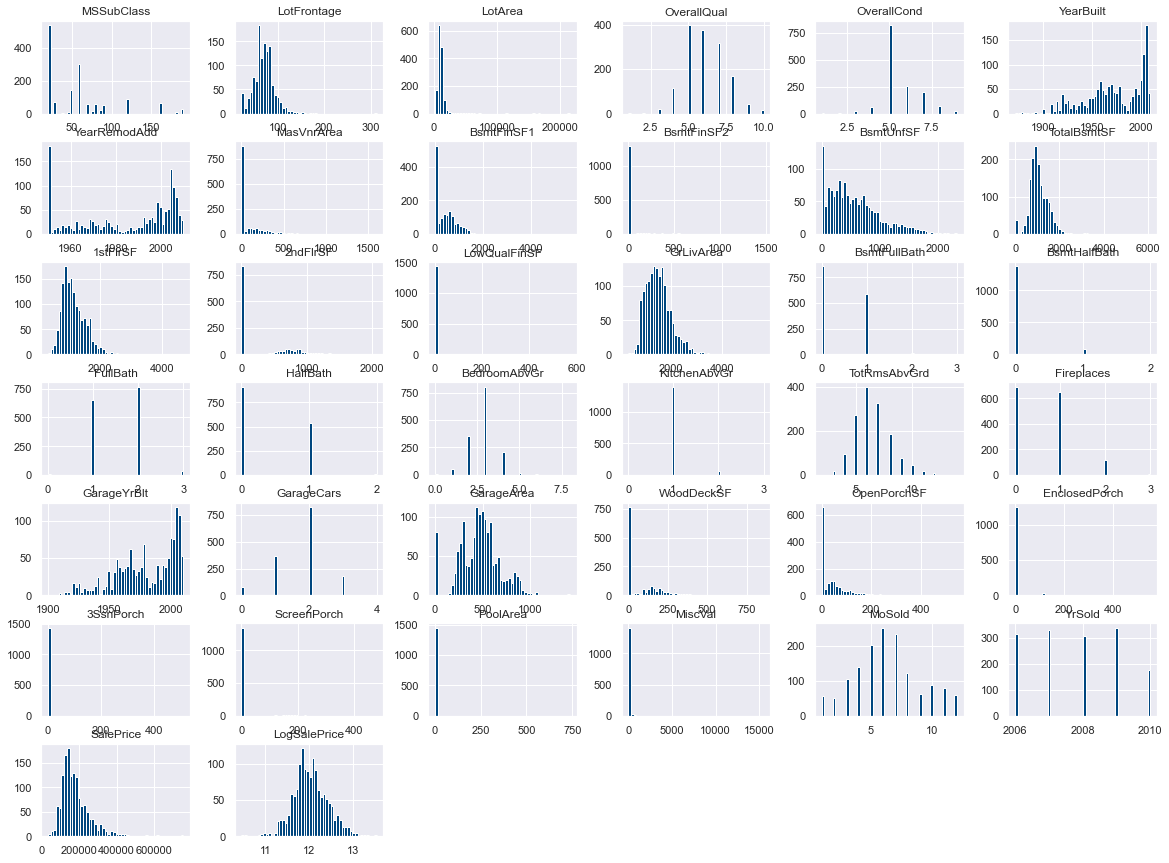

In [110]:
# histogram of numerical attributes
_ = train_df.hist(bins=50, figsize=(20,15))

In [49]:
# checking out some categorical columns
print(train_df.select_dtypes('object').columns)
print()
print(train_df.Electrical.value_counts())
print()
print(train_df.Foundation.value_counts())
print()
print(train_df.Neighborhood.value_counts())
print()
print(train_df.KitchenQual.value_counts())

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer     

## II. Data stories

### 1. Missing or 'NA' Data

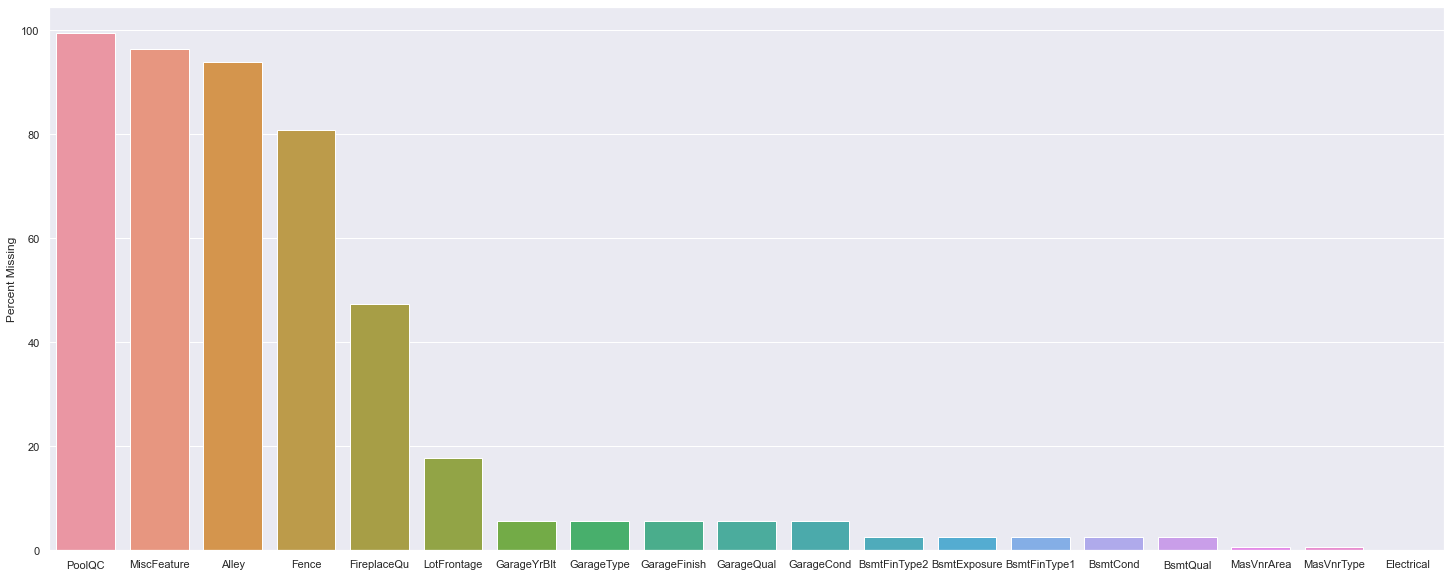

In [83]:
plt.subplots(figsize=(25,10))
percent_missing_df = train_df.isna().sum() * 100 / len(train_df)
percent_missing = percent_missing_df[percent_missing_df>0.].sort_values(ascending=False)
percent_missing.name = "Percent Missing"
_ = sns.barplot(x=percent_missing.index, y=percent_missing)

Examining the overall data, some features have nearly completely missing or unknown ('NA') data/values. However, this makes sense for features such as pool quality (PoolQC) and miscellaneous feature (MiscFeature) since many houses do not have pools or other miscellaneous features like elevators and tennis courts. For these features with a very high percentage of missing/unknown data, it may be better to not use them as predictors in our model as they may not have much of an effect on the sale price. For the features with a smaller percentage of missing data, we could still use them as predictors by either dropping the instances with missing values or by imputing them.

### 2. Distribution of Sale Price

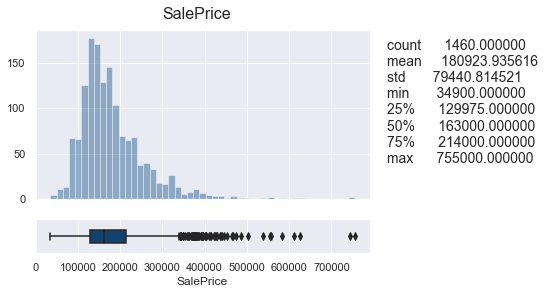

In [106]:
from dslab.visualization.visualize import distribution
_ = distribution(train_df['SalePrice'])

Looking specifically at our target variable, the sale prices for houses in Ames, it seems to be right skewed, which is reasonable as most houses with cost a fair amount, but there will be some houses that are much more expensive and so cost more. This suggests that we should do a log-transformation to generate a more normally distributed and symmetrical target variable. We also see that the higher sale prices of around US$750000 could be anomalies as they are quite far away from the rest of the sale prices, and thus may need to be removed (although it is definitely possible for houses to sell at that price so these instances will need to be examined further).

### 3. Sale Price by Neighbourhood

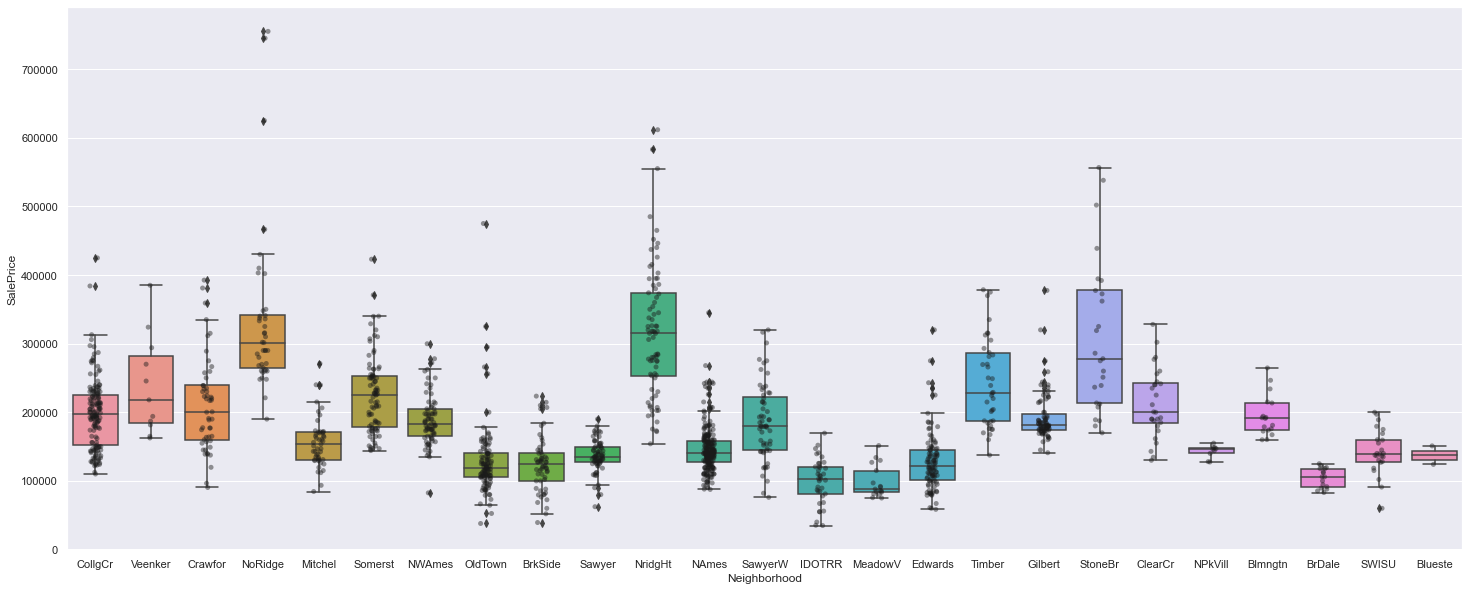

In [96]:
plt.subplots(figsize=(25,10))
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=train_df)
ax = sns.stripplot(x="Neighborhood", y="SalePrice", data=train_df, color=".1", alpha=0.45)

Now, looking at how a particular categorical variable affects the sale price, we see that different neighbourhoods have noticeable differences, particularly in the range and the mean, with most appearing to be either normally distributed or slightly right skewed. This seems to be sensible as some neighbourhoods may be poorer than others and so houses will sell at lower prices in these neighbourhoods. Furthermore, we see that neighbourhoods Northridge (NoRidge), Northridge Heights (NridgHt) and Stone Brook (StoneBr), with the highest mean sale prices at around 300000USD, seem to have quite a wide spread, whereas neighbourhoods Briardale (BrDale), Iowa DOT and Rail Road (IDOTRR) and Meadow Village (MeadowV), with the lowest mean sale prices at around 100000USD, seem to have a narrower spread. Moreover, there appear to be neighbourhoods with very few sales and instances, such as Bluestem (Blueste) and Northpark Villa (NPkVill), and these have a very narrow spread. This may just be a result of insufficient data, and we would probably expect a wider spread given more time and house sales. Regarding the predictive model, since many neighbourhoods are actually very similar in their distribution (particularly spread and mean), it may turn out to be not too helpful in predicting the sale price but this will need to be investigated further.

### 4. Correlation Heatmap of Numerical Features 

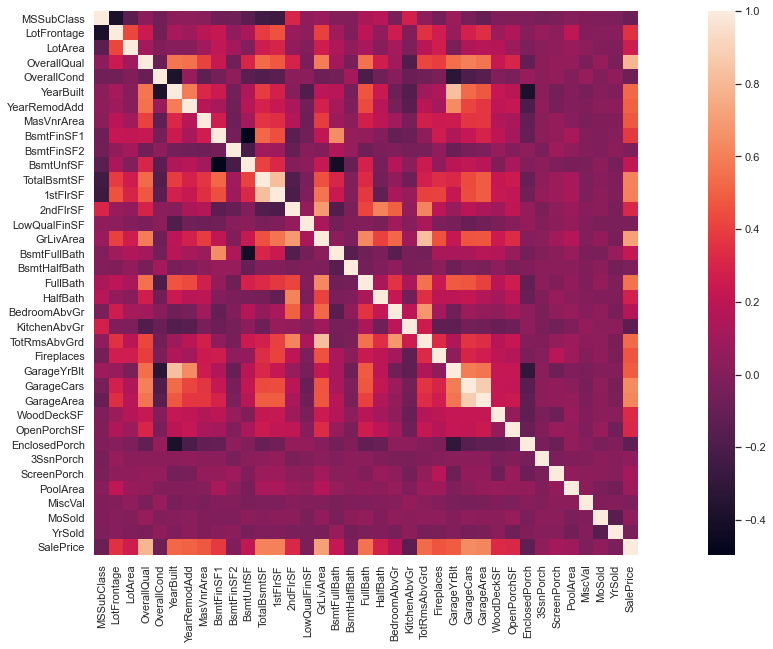

In [52]:
# this only uses numerical attributes
corr_matrix = train_df.corr()
plt.subplots(figsize=(25,10))
_ = sns.heatmap(corr_matrix, square=True)

Taking a closer look at the numerical features, we notice that some attributes, such as the type of dwelling involved in the sale (MSSubClass) and the overall material and finish of the house (OverallQual) which should be categorical instead of numerical, are present here as they have numerical values to represent their respective categories. These will need to be corrected in the data preprocessing stage. We also see that some features have high correlation with others. Making the model more generalisable means we need to ensure that the features picked are not collinear. For example, the total number of rooms above ground/grade (TotRomsAbvGrd) and ground/grade living area (GrLivArea) are very correlated so we would not use both to predict the sale price, but we could choose to use one as an explanatory variable. Looking at the row for sale price, we observe that the features which seem to be most correlated with the target are OverallQual, GrLivArea, size of garage in car capacity (GarageCars) and total square feet of basement area (TotalBsmtSF). These could be good predictors for our target variable, and will be investigated in the pairplot below. There are also several features that are not very correlated with our target, so are unlikely to be very good predictors for the sale price.

### 5. Pairplot of Highest Correlation Variables with SalePrice

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


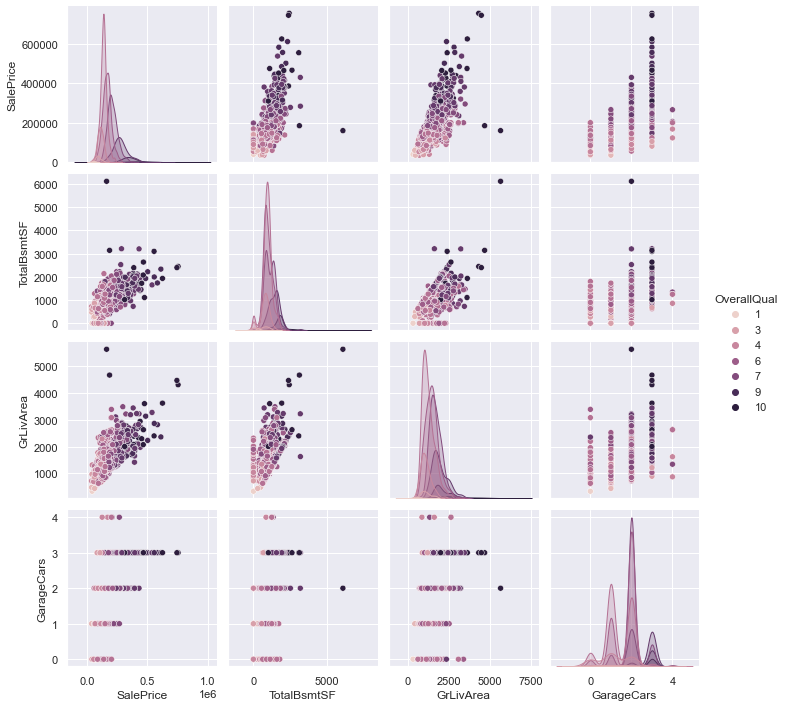

In [111]:
warnings.simplefilter(action='ignore')
print(train_df.select_dtypes("int64").columns)
numerical_train_df = train_df[["SalePrice","OverallQual","TotalBsmtSF","GrLivArea","GarageCars"]]
_ = sns.pairplot(numerical_train_df, hue="OverallQual")

We have picked some features that are highly correlated with the sale price using the heatmap to do our pairplot. These seem to have a positive linear relationship with the target variable. The variance in sale price also seems to increase as the explanatory variables' (x) values increase - the variance is not constant. However, this will likely be resolved once we use the log-transformed sale prices as the target variable instead, which will be normally distributed instead of right skewed. Furthermore, it seems that as the overall material and finish of the house (OverallQual) improves (with 1 representing 'Very Poor' and 10 representing 'Very Excellent'), the sale price also increases. Similarly, a general trend in the variables selected is that as its value increases, the overall quality increases as well. This may suggest there is a bit of correlation between OverallQual and these other variables (as well as between the variables themselves, such as between GrLivArea and TotalBsmtSF), so we may decide to not use all of them as predictors for the sale price even though they have the highest correlation with the target variable (again, this helps to ensure the model is generalisable).